In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as fitter

# Experiment 1

In [8]:
#Code nabbed from: http://www.noah.org/wiki/Wavelength_to_RGB_in_Python
def wavelength_to_rgb(wavelength, gamma=0.8):

    '''This converts a given wavelength of light to an 
    approximate RGB color value. The wavelength must be given
    in nanometers in the range from 380 nm through 750 nm
    (789 THz through 400 THz).

    Based on code by Dan Bruton
    http://www.physics.sfasu.edu/astro/color/spectra.html
    '''

    wavelength = float(wavelength)
    if wavelength >= 380 and wavelength <= 440:
        attenuation = 0.3 + 0.7 * (wavelength - 380) / (440 - 380)
        R = ((-(wavelength - 440) / (440 - 380)) * attenuation) ** gamma
        G = 0.0
        B = (1.0 * attenuation) ** gamma
    elif wavelength >= 440 and wavelength <= 490:
        R = 0.0
        G = ((wavelength - 440) / (490 - 440)) ** gamma
        B = 1.0
    elif wavelength >= 490 and wavelength <= 510:
        R = 0.0
        G = 1.0
        B = (-(wavelength - 510) / (510 - 490)) ** gamma
    elif wavelength >= 510 and wavelength <= 580:
        R = ((wavelength - 510) / (580 - 510)) ** gamma
        G = 1.0
        B = 0.0
    elif wavelength >= 580 and wavelength <= 645:
        R = 1.0
        G = (-(wavelength - 645) / (645 - 580)) ** gamma
        B = 0.0
    elif wavelength >= 645 and wavelength <= 750:
        attenuation = 0.3 + 0.7 * (750 - wavelength) / (750 - 645)
        R = (1.0 * attenuation) ** gamma
        G = 0.0
        B = 0.0
    else:
        R = 0.0
        G = 0.0
        B = 0.0
    R *= 255
    G *= 255
    B *= 255
    return (int(R), int(G), int(B))

In [2]:
offset = 5 - 1.0 - 1.4

In [9]:
#All cm +/- 0.05
screenDist = 0.0
gratingDist = 25.5
firstMin = 9.5
secondMin = 22.1
rLambda = 634.6e-9

In [4]:
#Calculating Slits per centimeter
spc = np.sin(np.arctan(firstMin/(gratingDist))) / rLambda / 100
print('Approximate Slits per centimeter: {:.4f}'.format(spc))

Approximate Slits per centimeter: 5501.2452


In [6]:
theta1 = np.rad2deg(np.arctan(firstMin/(gratingDist)))
print('Approximate angle of 1nst order maxima: {:.4f} degrees'.format(theta1))
theta2 = np.rad2deg(np.arctan(secondMin/(gratingDist)))
print('Approximate angle of 2nd order maxima: {:.4f} degrees'.format(theta2))

Approximate angle of 1nst order maxima: 20.4328 degrees
Approximate angle of 2nd order maxima: 40.9144 degrees


In [11]:
WL

array([ 634.6       , 1190.51325544])

# Experiment 2

RED LED
Angle between grating and inner edge: 15.1331 degrees
Angle between grating and outer edge: 20.1204 degrees
Minimum Wavelength: 474.5506 nm
Maximum Wavelength: 638.3420 nm


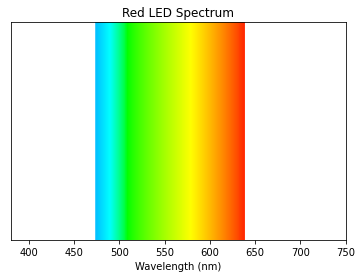

In [16]:
#Red LED
screenLoc = 4.9
gratingLoc = 36.7
innerSep = np.array([8.6, 8.6])
outerSep = np.array([11.7, 11.6])
slitDist = 0.1e7 #converted to nanometers
angle1 = np.rad2deg(np.arctan(innerSep.mean() / (gratingLoc - screenLoc)))
angle2 = np.rad2deg(np.arctan(outerSep.mean() / (gratingLoc - screenLoc)))
waveMin = np.sin(np.deg2rad(angle1)) / spc *1e7
waveMax = np.deg2rad(angle2) / spc *1e7
print('RED LED')
print('Angle between grating and inner edge: {:.4f} degrees'.format(angle1))
print('Angle between grating and outer edge: {:.4f} degrees'.format(angle2))
print('Minimum Wavelength: {:.4f} nm'.format(waveMin))
print('Maximum Wavelength: {:.4f} nm'.format(waveMax))


WL = np.linspace(waveMin,waveMax,300)
colors = []
for i in WL:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Red LED Spectrum')
ax.set_yticks([]);
plt.savefig('Lab 4 Experiment 2 RED.png', facecolor='w', format='png', bbox_inches='tight')

BLUE LED
Angle between grating and inner edge: 12.3283 degrees
Angle between grating and outer edge: 15.9692 degrees
Minimum Wavelength: 388.1187 nm
Maximum Wavelength: 506.6397 nm


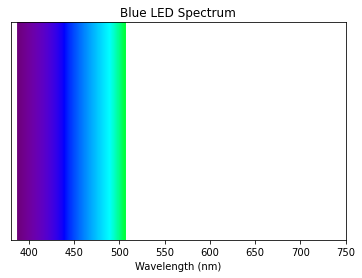

In [17]:
#Blue LED
innerSep = np.array([6.9, 7.0])
outerSep = np.array([9.0, 9.2])

angle1 = np.rad2deg(np.arctan(innerSep.mean() / (gratingLoc - screenLoc)))
angle2 = np.rad2deg(np.arctan(outerSep.mean() / (gratingLoc - screenLoc)))
waveMin = np.sin(np.deg2rad(angle1)) / spc *1e7
waveMax = np.deg2rad(angle2) / spc *1e7
print('BLUE LED')
print('Angle between grating and inner edge: {:.4f} degrees'.format(angle1))
print('Angle between grating and outer edge: {:.4f} degrees'.format(angle2))
print('Minimum Wavelength: {:.4f} nm'.format(waveMin))
print('Maximum Wavelength: {:.4f} nm'.format(waveMax))

WL = np.linspace(waveMin,waveMax,300)
colors = []
for i in WL:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Blue LED Spectrum')
ax.set_yticks([]);
plt.savefig('Lab 4 Experiment 2 BLUE.png', facecolor='w', format='png', bbox_inches='tight')

GREEN LED
Angle between grating and inner edge: 14.1210 degrees
Angle between grating and outer edge: 18.7587 degrees
Minimum Wavelength: 443.4823 nm
Maximum Wavelength: 595.1384 nm


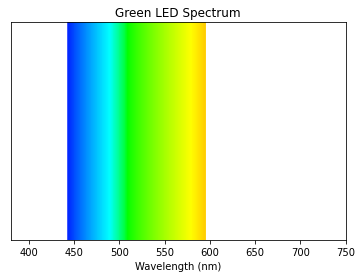

In [18]:
#Green LED
innerSep = np.array([8.1, 7.9])
outerSep = np.array([11.0, 10.6])

angle1 = np.rad2deg(np.arctan(innerSep.mean() / (gratingLoc - screenLoc)))
angle2 = np.rad2deg(np.arctan(outerSep.mean() / (gratingLoc - screenLoc)))
waveMin = np.sin(np.deg2rad(angle1)) / spc *1e7
waveMax = np.deg2rad(angle2) / spc *1e7
print('GREEN LED')
print('Angle between grating and inner edge: {:.4f} degrees'.format(angle1))
print('Angle between grating and outer edge: {:.4f} degrees'.format(angle2))
print('Minimum Wavelength: {:.4f} nm'.format(waveMin))
print('Maximum Wavelength: {:.4f} nm'.format(waveMax))

WL = np.linspace(waveMin,waveMax,300)
colors = []
for i in WL:
    colors.append(wavelength_to_rgb(i))
colors = np.array(colors) / 255
fig, ax = plt.subplots() 
ax.vlines(x=WL, ymin = 0, ymax=1, colors=colors)
ax.set_xlim(380,750)
ax.set_ylim(0,1)
ax.set_xlabel('Wavelength (nm)')
ax.set_title('Green LED Spectrum')
ax.set_yticks([]);
plt.savefig('Lab 4 Experiment 2 GREEN.png', facecolor='w', format='png', bbox_inches='tight')

# Experiment 3

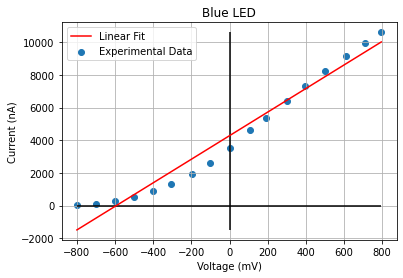

Slope: 7.2222
Y Intercept: 4283.2353
Fitted X Intercept: -593.0668208846101


In [37]:
#BLUE LED
voltage = np.array([-800, -699, -500, -602, -401, -305, -199, -103, 2, 106,
                   191, 299, 397, 501, 609, 709, 795]) #milivolts

current = np.array([27, 120, 520, 271, 868, 1309, 1941, 2620, 3522, 4612,
                   5359, 6406, 7315, 8222, 9142, 9941, 10620]) #nanoamps
def f(x, a0, a1):
    return x*a0 + a1

par, cov = fitter.curve_fit(f, voltage, current)
par
x = np.linspace(voltage[0],voltage[-1], 50)
y=f(x,par[0],par[1])
plt.plot(x,y,c='red',label='Linear Fit')
plt.scatter(voltage,current, label='Experimental Data')
plt.title('Blue LED')
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (nA)')
plt.vlines(0,min(y[0],current[0]),max(y[-1],current[-1]),color='black')
plt.hlines(0,voltage[0],voltage[-1],color='black')
plt.grid();
plt.legend()
plt.savefig('Lab 4 Experiment 3 BLUE.png', facecolor='w', format='png', bbox_inches='tight')
plt.show();
print('Slope: {:.4f}'.format(par[0]))
print('Y Intercept: {:.4f}'.format(par[1]))
SVB = -par[1]/par[0]
print('Fitted X Intercept: {}'.format(SVB))

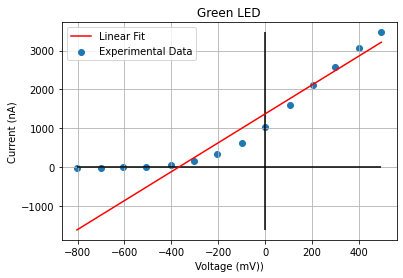

Slope: 3.7195
Y Intercept: 1368.3670
Fitted X Intercept: -367.88841394512076


In [36]:
#Green LED
voltage = np.array([-803, -700, -607, -507, -403, -302, -204, -99, 0, 106, 205,
                   298, 403, 496])#milivolts

current = np.array([-16, -14, -9, 10, 49, 150, 324, 628, 1041, 1597, 2117,
                   2575, 3064, 3471])#nanoamps
par1, cov1 = fitter.curve_fit(f, voltage[3:], current[3:])
par
x = np.linspace(voltage[0],voltage[-1], 50)
y=f(x,par1[0],par1[1])
plt.plot(x,y,c='red',label='Linear Fit')
plt.scatter(voltage,current, label='Experimental Data')
plt.xlabel('Voltage (mV))')
plt.ylabel('Current (nA)')
plt.title('Green LED')
plt.hlines(0,voltage[0],voltage[-1],color='black')
plt.vlines(0,min(y[0],current[0]),max(y[-1],current[-1]),color='black')
plt.grid();
plt.legend()
plt.savefig('Lab 4 Experiment 3 GREEN.png', facecolor='w', format='png', bbox_inches='tight')
plt.show();
print('Slope: {:.4f}'.format(par1[0]))
print('Y Intercept: {:.4f}'.format(par1[1]))
SVG = -par1[1]/par1[0]
print('Fitted X Intercept: {}'.format(SVG))

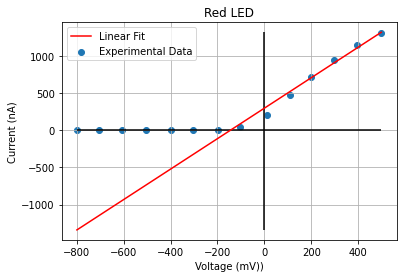

Slope: 2.0523
Y Intercept: 298.1427
Fitted X Intercept: -145.27592420942372


In [35]:
#RED LED
voltage = np.array([-799, -704, -605, -506, -398, -303, -197, -104, 9, 107, 198,
                   296, 396, 498])#milivolts

current = np.array([-1, 0, -1, 0, -1, 3, 8, 49, 203, 471, 721,
                   943, 1145, 1314])#nanoamps
par2, cov2 = fitter.curve_fit(f, voltage[6:], current[6:])
par
x = np.linspace(voltage[0],voltage[-1], 50)
y = f(x,par2[0],par2[1])
plt.plot(x,y,c='red',label='Linear Fit')
plt.scatter(voltage,current, label='Experimental Data')
plt.xlabel('Voltage (mV))')
plt.ylabel('Current (nA)')
plt.title('Red LED')
plt.hlines(0,voltage[0],voltage[-1],color='black')
plt.vlines(0,min(y[0],current[0]),max(y[-1],current[-1]),color='black')
plt.grid();
plt.legend()
plt.savefig('Lab 4 Experiment 3 RED.png', facecolor='w', format='png', bbox_inches='tight')
plt.show();
print('Slope: {:.4f}'.format(par2[0]))
print('Y Intercept: {:.4f}'.format(par2[1]))
SVR = -par2[1]/par2[0]
print('Fitted X Intercept: {}'.format(SVR))

In [ ]:
[1] / [0]

In [67]:
u0 = np.sqrt((cov[0][0]*par[1]/par[0]**2) + (cov[1][1]/par[0])**2)
u1 = np.sqrt((cov1[0][0]*par1[1]/par1[0]**2) + (cov1[1][1]/par1[0])**2)
u2 = np.sqrt((cov2[0][0]*par2[1]/par2[0]**2) + (cov2[1][1]/par2[0])**2)
u0,u1,u2

(4144.976834371938, 2142.887239907378, 471.51299555078447)

In [64]:
cov2[0][0], cov[1][1]

(0.01305896554210904, 29935.759638010673)

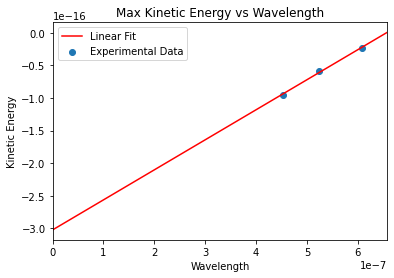

In [86]:
e = 1.609e-19
c = 3e8
h = np.abs(e * (-par1[1]/par1[0] + par[1]/par[0])/1e3 / (c*(1/533e-9 - 1/462e-9)) )
h * 6.242e18

plt.scatter([rLambda,gLambda,bLambda],np.array([SVR,SVG,SVB])*e,label='Experimental Data')
plt.xlim(0,rLambda + 50e-9)
plt.title('Max Kinetic Energy vs Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Kinetic Energy')

par3, cov3 = fitter.curve_fit(f, [rLambda,gLambda,bLambda],np.array([SVR,SVG,SVB])*e)
par
x = np.linspace(0,rLambda+50e-9, 50)
y = f(x,par3[0],par3[1])
plt.plot(x,y,c='red',label='Linear Fit')

plt.legend();

#plt.savefig('Lab 4 Experiment 3 KSTOP.png', facecolor='w', format='png', bbox_inches='tight')

array([-1.26796423e-22,  1.84505932e-16])

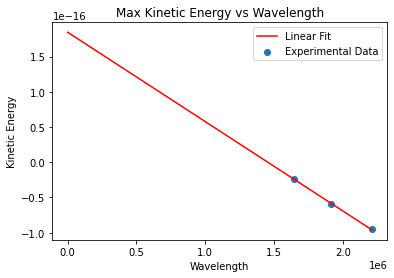

In [88]:
e = 1.609e-19
c = 3e8
h = np.abs(e * (-par1[1]/par1[0] + par[1]/par[0])/1e3 / (c*(1/533e-9 - 1/462e-9)) )
h * 6.242e18

plt.scatter(1/np.array([rLambda,gLambda,bLambda]),np.array([SVR,SVG,SVB])*e,
            label='Experimental Data')
#plt.xlim(0,rLambda + 50e-9)
plt.title('Max Kinetic Energy vs Wavelength')
plt.xlabel('Wavelength')
plt.ylabel('Kinetic Energy')

par3, cov3 = fitter.curve_fit(f, 1/np.array([rLambda,gLambda,bLambda]),np.array([SVR,SVG,SVB])*e)
par
x = np.linspace(0,1/bLambda, 50)
y = f(x,par3[0],par3[1])
plt.plot(x,y,c='red',label='Linear Fit')

plt.legend();
par3
#plt.savefig('Lab 4 Experiment 3 KSTOP.png', facecolor='w', format='png', bbox_inches='tight')

In [53]:
-par1[1]/par1[0] - SVG, par[1]/par[0] + SVB

(0.0, 0.0)

In [85]:
par3

array([-1.26796423e-22,  1.84505932e-16])

In [61]:
rLambda = 618e-9 - 10e-9
gLambda = 533e-9 - 10e-9
bLambda = 462e-9 - 10e-9

In [62]:
h1 = np.abs(e * (SVG - SVB)/1e3 / (c*(1/gLambda - 1/bLambda)) )* 6.242e18
h2 = np.abs(e * (SVG - SVR)/1e3 / (c*(1/gLambda - 1/rLambda)) )* 6.242e18
h3 = np.abs(e * (SVR - SVB)/1e3 / (c*(1/rLambda - 1/bLambda)) )* 6.242e18
h = (h1+h2+h3)/3
print(h)
print(4.136e-15/h)

2.6462892533475447e-15
1.562943277938335


### Below is test code used for prelimary analysis of experiments 4 and 5, to see the full analysis code check the other files in the repository

# Experiment 4

In [16]:
def calcH(lambda1, volt1, lambda2, volt2):
    c = 3e8
    e = 1.609e-19
    t1 = e * (volt1 - volt2)
    t2 = c * (1/lambda1 - 1/lambda2)
    return np.abs(t1/t2)

In [23]:
#Violet Light
vLambda = 405e-9
stopVoltV = np.array([-1.15, -1.09, -1.09, -1.10, -1.11])#Volts

#Green Laser
gLambda = 532e-9
stopVoltG = np.array([-0.443, -0.485, -0.464, -0.424, -0.455])#Volts

#Red Laser
rLambda = 634.6e-9
stopVoltR = np.array([-0.052, -0.063, -0.045, -0.050, -0.068])#Volts

In [24]:
e = 1.609e-19
c = 3e8
h = np.abs(e * (stopVoltV.mean() - stopVoltG.mean()) / (c*(1/vLambda - 1/gLambda)) )
h = calcH(vLambda, stopVoltV.mean(), rLambda, stopVoltR.mean())
h #* 6.242e18

6.31827953325784e-34

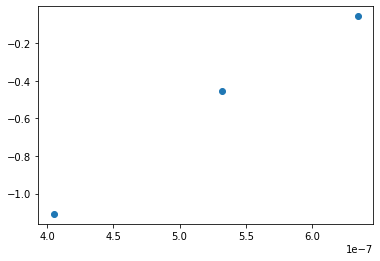

In [32]:
x = [rLambda, gLambda, vLambda]
y = [stopVoltR.mean(), stopVoltG.mean(), stopVoltV.mean()]
plt.scatter(x,y)

In [29]:
print(calcH(vLambda, stopVoltV.mean(), rLambda, stopVoltR.mean()))
print(calcH(vLambda, stopVoltV.mean(), gLambda, stopVoltG.mean()))
print(calcH(gLambda, stopVoltG.mean(), rLambda, stopVoltR.mean()))

6.31827953325784e-34
5.948981798740157e-34
7.034551655012352e-34


In [30]:
(calcH(vLambda, stopVoltV.mean(), rLambda, stopVoltR.mean())+ calcH(vLambda, stopVoltV.mean(), gLambda, stopVoltG.mean())+calcH(gLambda, stopVoltG.mean(), rLambda, stopVoltR.mean()))/3

6.433937662336783e-34

# Experiment 5

In [47]:
def g(x, a0, a1):
    return a0*np.cos(np.deg2rad(x)*a1)**2 



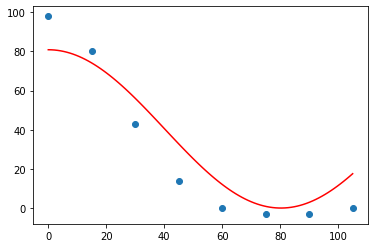

In [62]:
#Violet Laset
relativeAngle = np.array([0, 15, 30, 45, 60, 75, 90, 105]) #degrees
current = np.array([98, 80, 43, 14, 0, -3, -3,0]) #nanoamps
tubeVoltage = 230

I = np.cos(np.deg2rad(relativeAngle))**2
#plt.scatter(I,current)
#plt.show()
plt.scatter(relativeAngle,current)

par, cov = fitter.curve_fit(g, relativeAngle[:], current[:],[100,  1.12147659])
x = np.linspace(0,105,100)
plt.plot(x,g(x,par[0],par[1]),c='red')

In [63]:
#blue LED
relativeAngle = np.array([0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]) #degrees
current = np.array([903, 852, 706, 509, 305, 98, 7, 65, 254, 498, 717, 845, 895]) #nanoamps
tubeVoltage = 224
#ON L28

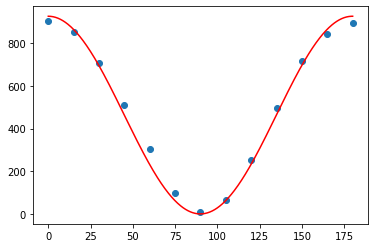

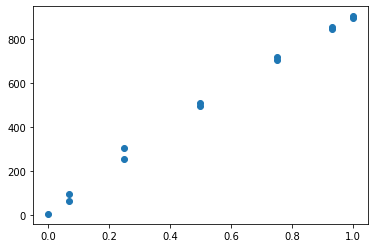

In [70]:

plt.scatter(relativeAngle,current)
par, cov = fitter.curve_fit(g, relativeAngle[:], current[:],[900,1])
x = np.linspace(0,180,500)
plt.plot(x,g(x,par[0],par[1]),c='red')
plt.show()
I = np.cos(np.deg2rad(relativeAngle))**2
plt.scatter(I,current)

In [73]:
#Green LED

current = np.array([407, 378, 309, 203, 105, 21, -7, 23, 112, 218, 318, 382, 400]) #nanoamps
relativeAngle = np.arange(0,15*len(current),15) #degrees
tubeVoltage = 228
#ON L30

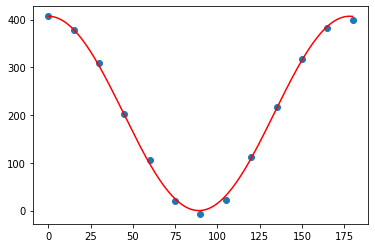

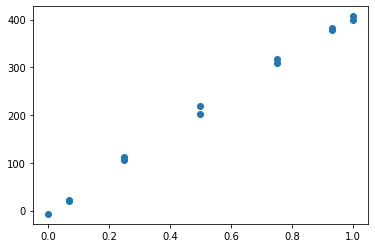

In [74]:
plt.scatter(relativeAngle,current)
par, cov = fitter.curve_fit(g, relativeAngle[:], current[:],[900,1])
x = np.linspace(0,180,500)
plt.plot(x,g(x,par[0],par[1]),c='red')
plt.show()
I = np.cos(np.deg2rad(relativeAngle))**2
plt.scatter(I,current)